In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

encodings_to_try = ['utf-8', 'Latin-1', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv('/kaggle/input/classify-news-into-category/News Categoires.csv', encoding=encoding)
        print("File read successfully with encoding:", encoding)
        print(df.head())
        break
    except UnicodeDecodeError:
        pass

df.head()

File read successfully with encoding: Latin-1
                                                News Category
0  The IMF now expects China's economy to grow by...  Economy
1  Manufacturing activity in the Eurozone has dec...  Economy
2  Continued disruptions in the global supply cha...  Economy
3  Concerns about food security remain high due t...  Economy
4  While some central banks, like the US Federal ...  Economy


,News,Category
0,The IMF now expects China's economy to grow by...,Economy
1,Manufacturing activity in the Eurozone has dec...,Economy
2,Continued disruptions in the global supply cha...,Economy
3,Concerns about food security remain high due t...,Economy
4,"While some central banks, like the US Federal ...",Economy


**What steps can be taken to clean and preprocess the text data in the 'News' column?**

In [2]:
# Import libraries for text preprocessing
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Function to clean and preprocess text
def clean_text(text):
    # Remove special characters, numbers, and punctuations
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Join the words back into a string
    cleaned_text = ' '.join(filtered_words)
    
    return cleaned_text

# Apply the cleaning function to the 'News' column
df['Cleaned_News'] = df['News'].apply(clean_text)


**How can we explore the distribution of news categories in the dataset?**

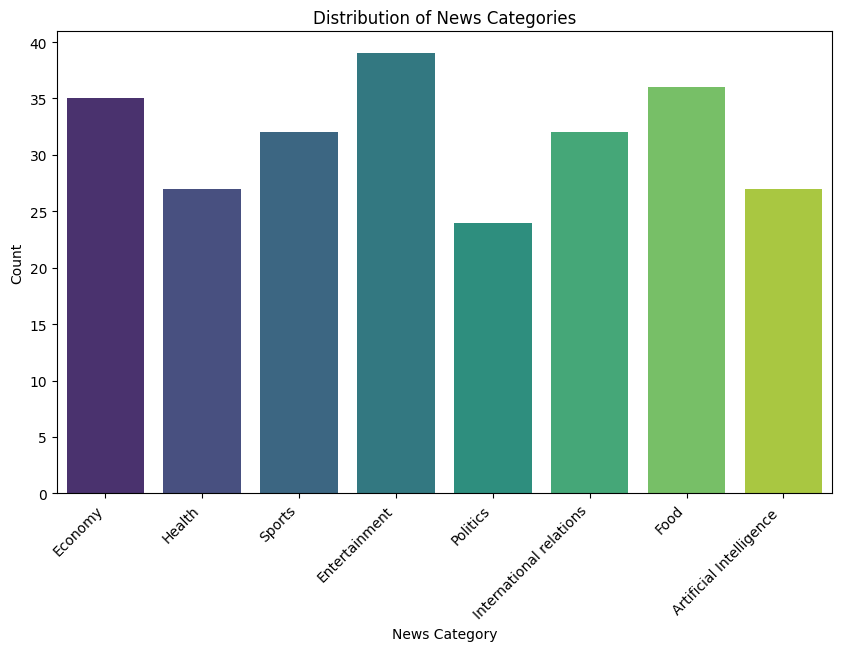

In [3]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of news categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df, palette='viridis')
plt.title('Distribution of News Categories')
plt.xlabel('News Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


**How can we analyze the distribution of the length of the cleaned news articles?**

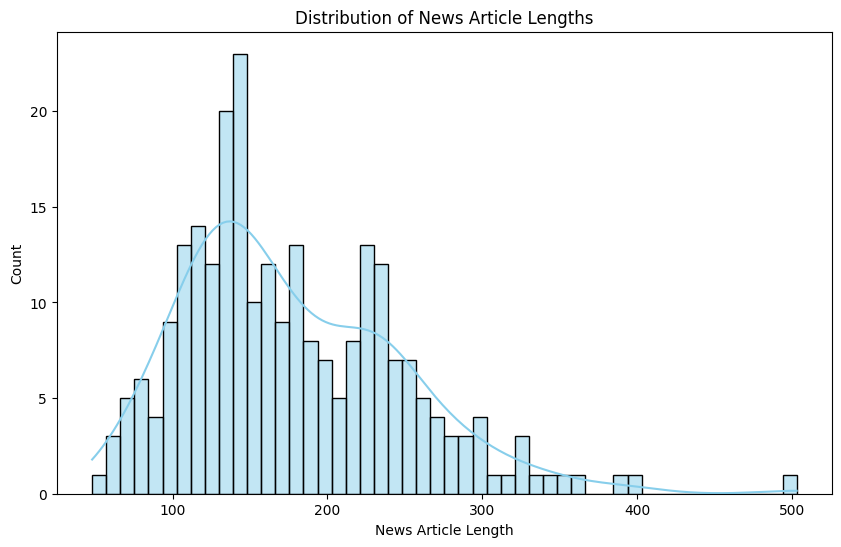

In [4]:
# Calculate the length of each cleaned news article
df['News_Length'] = df['Cleaned_News'].apply(len)

# Plot the distribution of news article lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['News_Length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of News Article Lengths')
plt.xlabel('News Article Length')
plt.ylabel('Count')
plt.show()


**How can we analyze the most common words in the cleaned news articles?**

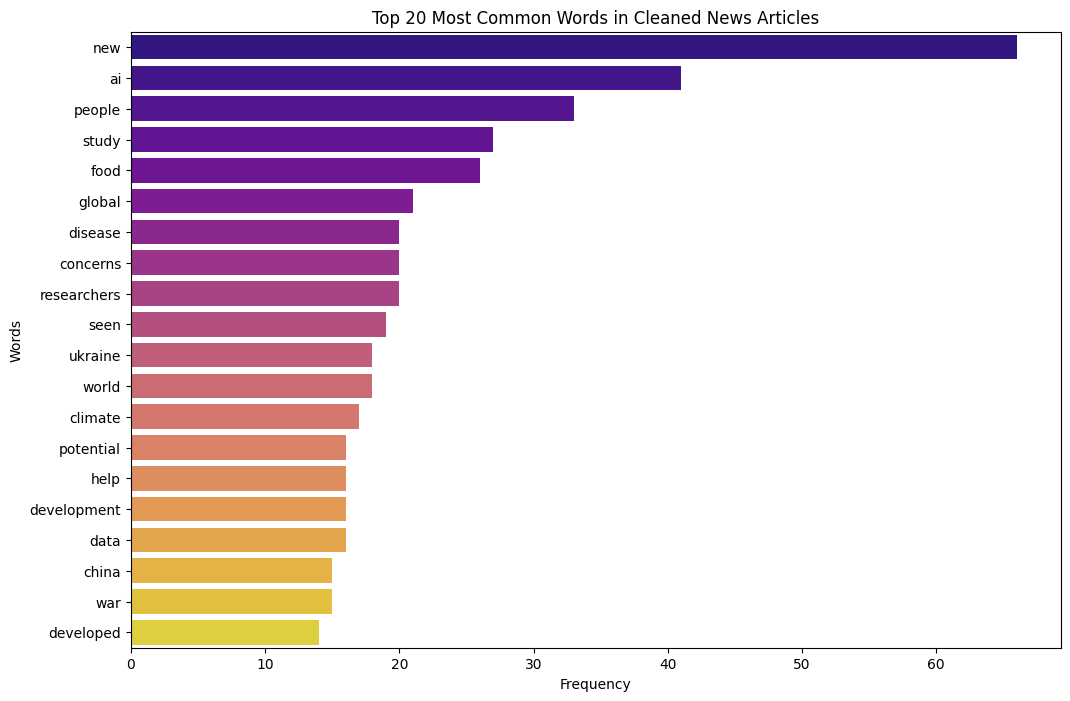

In [5]:
# Import libraries for text analysis
from sklearn.feature_extraction.text import CountVectorizer

# Create a bag-of-words representation of the cleaned news articles
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
bow_matrix = vectorizer.fit_transform(df['Cleaned_News'])

# Get the most common words
word_freq = pd.DataFrame(bow_matrix.sum(axis=0), columns=vectorizer.get_feature_names_out())
word_freq = word_freq.transpose().sort_values(0, ascending=False).head(20)

# Plot the most common words
plt.figure(figsize=(12, 8))
sns.barplot(x=word_freq[0], y=word_freq.index, palette='plasma')
plt.title('Top 20 Most Common Words in Cleaned News Articles')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


**How can we analyze the distribution of news article lengths across different categories?**

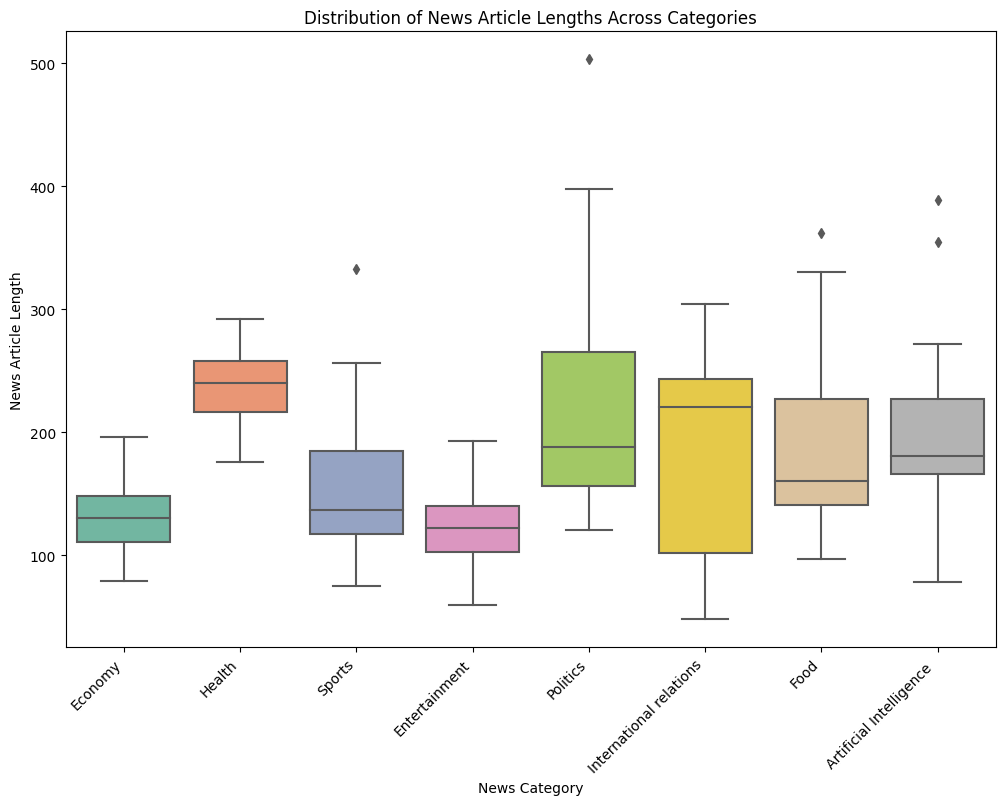

In [6]:
# Plot the distribution of news article lengths for each category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='News_Length', data=df, palette='Set2')
plt.title('Distribution of News Article Lengths Across Categories')
plt.xlabel('News Category')
plt.ylabel('News Article Length')
plt.xticks(rotation=45, ha='right')
plt.show()


**How can we perform a word cloud analysis to visually represent the most frequent words in the cleaned news articles?**

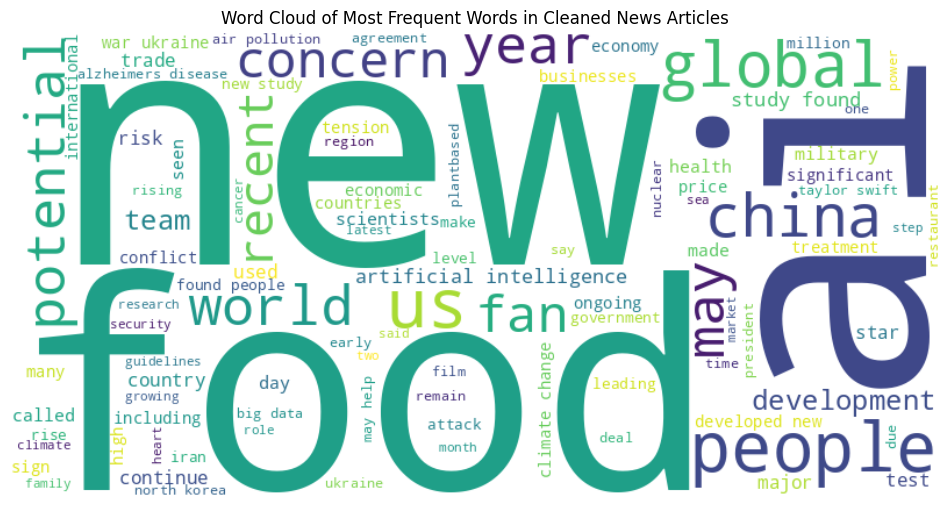

In [7]:
# Import library for word cloud visualization
from wordcloud import WordCloud

# Concatenate all cleaned news articles into a single string
all_text = ' '.join(df['Cleaned_News'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=42, max_words=100, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Most Frequent Words in Cleaned News Articles')
plt.axis('off')
plt.show()


**How can we analyze the correlation between the length of news articles and the category they belong to?**

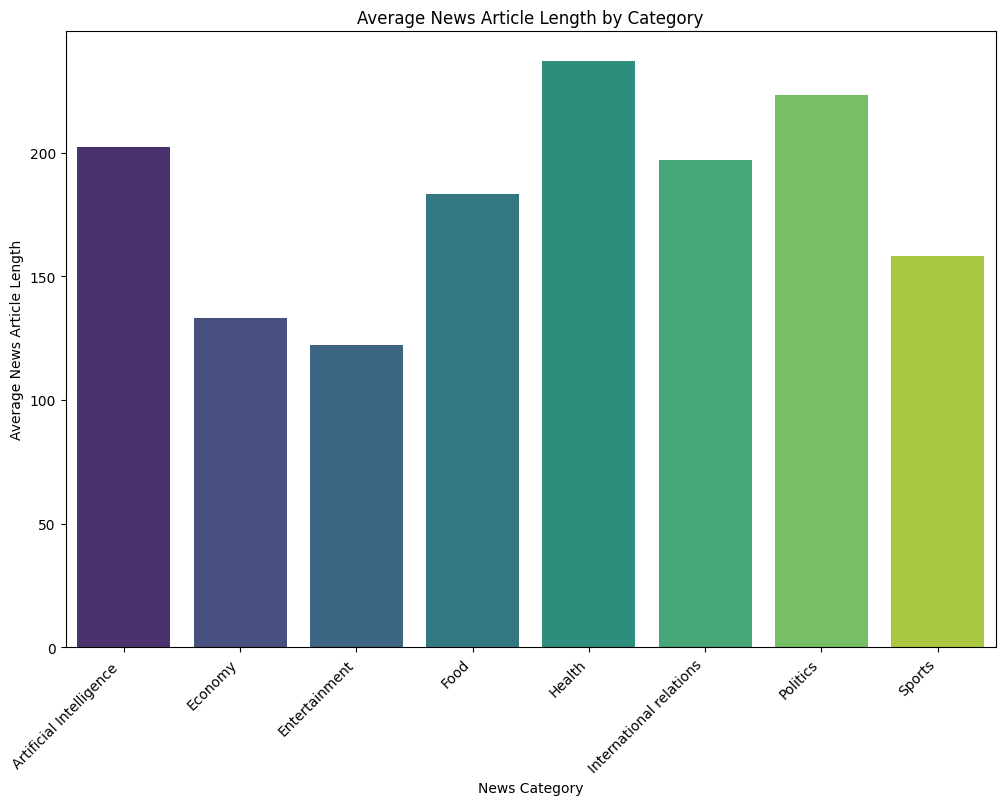

In [8]:
# Calculate the correlation between news article length and category using a pivot table
length_category_pivot = df.pivot_table(index='Category', values='News_Length', aggfunc='mean')

# Plot the correlation
plt.figure(figsize=(12, 8))
sns.barplot(x=length_category_pivot.index, y=length_category_pivot['News_Length'], palette='viridis')
plt.title('Average News Article Length by Category')
plt.xlabel('News Category')
plt.ylabel('Average News Article Length')
plt.xticks(rotation=45, ha='right')
plt.show()


**How can we perform a sentiment analysis on the cleaned news articles to understand the overall sentiment in the dataset?**

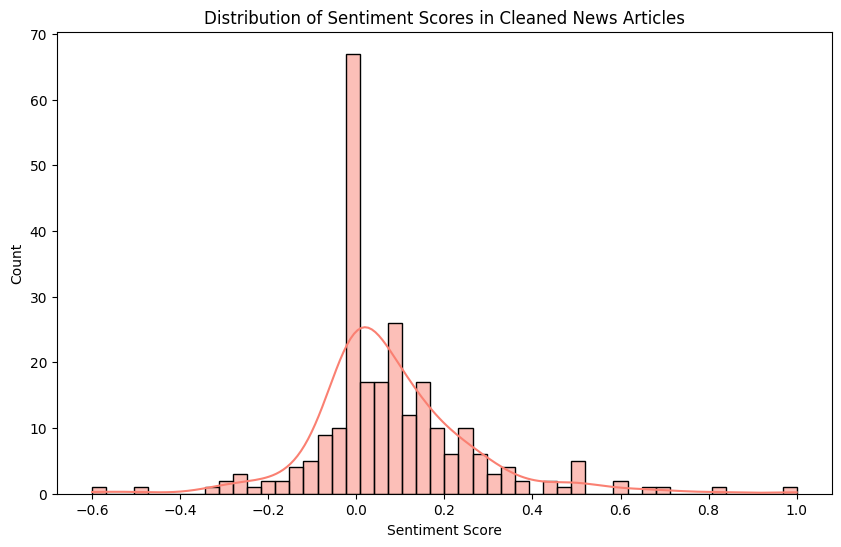

In [9]:
# Import library for sentiment analysis
from textblob import TextBlob

# Function to get sentiment polarity of a text
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment analysis function to the cleaned news articles
df['Sentiment'] = df['Cleaned_News'].apply(get_sentiment)

# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Sentiment Scores in Cleaned News Articles')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()


**How can we explore the relationship between the sentiment of news articles and their respective categories?**

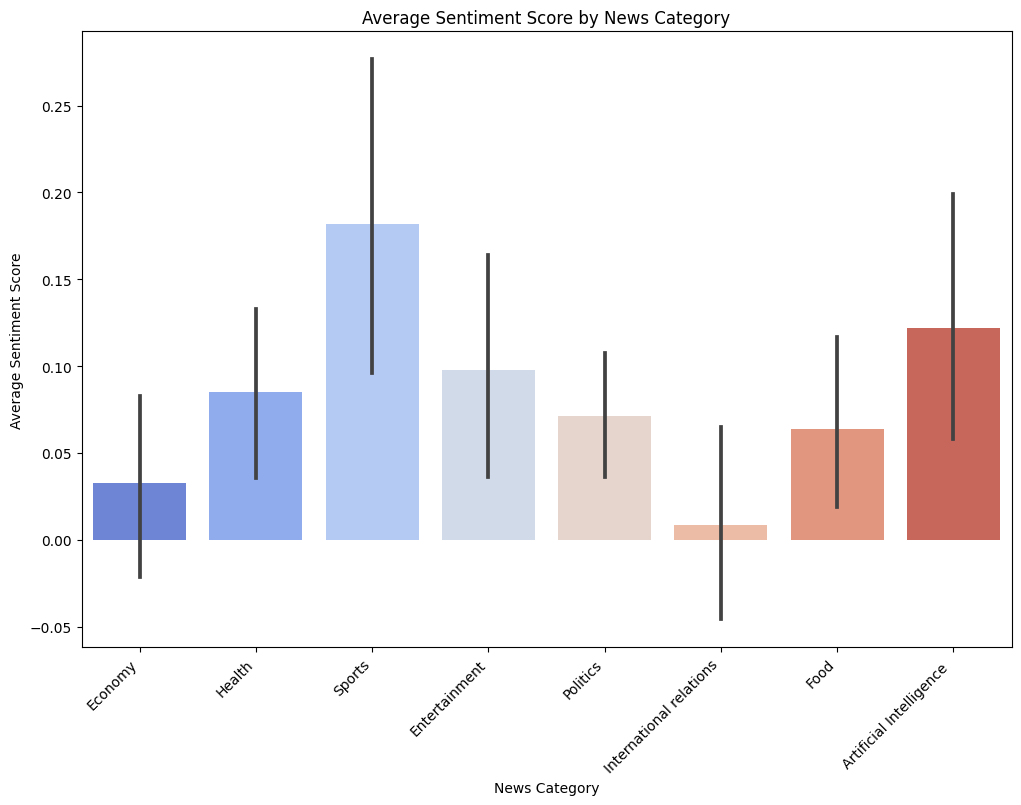

In [10]:
# Plot the average sentiment score for each category
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Sentiment', data=df, palette='coolwarm')
plt.title('Average Sentiment Score by News Category')
plt.xlabel('News Category')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.show()


**How can we use a machine learning model to classify news articles into their respective categories?**

In [11]:
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_News'], df['Category'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create and train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Predict the categories on the test set
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model performance with zero_division parameter
classification_rep = classification_report(y_test, y_pred, zero_division=1)

# Print the results
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.7059

Confusion Matrix:
 [[4 0 2 0 0 0 0 0]
 [0 7 0 1 0 1 0 0]
 [0 0 5 0 0 0 0 0]
 [0 0 2 8 0 0 0 0]
 [0 1 0 0 5 0 0 0]
 [0 1 0 0 0 4 0 0]
 [0 0 0 0 0 4 0 0]
 [0 0 3 0 0 0 0 3]]

Classification Report:
                           precision    recall  f1-score   support

Artificial Intelligence        1.00      0.67      0.80         6
                 Economy       0.78      0.78      0.78         9
           Entertainment       0.42      1.00      0.59         5
                    Food       0.89      0.80      0.84        10
                  Health       1.00      0.83      0.91         6
 International relations       0.44      0.80      0.57         5
                Politics       1.00      0.00      0.00         4
                  Sports       1.00      0.50      0.67         6

                accuracy                           0.71        51
               macro avg       0.82      0.67      0.64        51
            weighted avg       0.83      0.71      0.70  

**Hyperparameter Tuning**

In [12]:
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight

# Define the parameter grid for the TF-IDF vectorizer and Naive Bayes classifier
param_grid = {
    'tfidf__max_features': [5000, 10000, 15000],
    'classifier__alpha': [0.1, 0.5, 1.0],
}

# Create a pipeline with TF-IDF vectorizer and Naive Bayes classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'classifier__alpha': 0.5, 'tfidf__max_features': 5000}


**Handling Imbalanced Classes**

In [13]:
# Calculate class weights to address imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=df['Category'].unique(), y=y_train)

# Create and train a Naive Bayes classifier with class weights
classifier = MultinomialNB(class_prior=class_weights)
classifier.fit(X_train_tfidf, y_train)

# Continue with model evaluation and prediction
y_pred_weighted = classifier.predict(X_test_tfidf)

# Evaluate the model performance with class weights
classification_rep_weighted = classification_report(y_test, y_pred_weighted, zero_division=1)

# Print the results with class weights
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)

print(f"\nAccuracy with Class Weights: {accuracy_weighted:.4f}")
print("\nConfusion Matrix with Class Weights:\n", conf_matrix_weighted)
print("\nClassification Report with Class Weights:\n", classification_rep_weighted)



Accuracy with Class Weights: 0.6471

Confusion Matrix with Class Weights:
 [[4 1 0 0 1 0 0 0]
 [0 9 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0]
 [0 3 0 2 5 0 0 0]
 [0 1 0 0 5 0 0 0]
 [0 2 0 0 0 3 0 0]
 [0 1 0 0 0 3 0 0]
 [0 1 0 0 0 0 0 5]]

Classification Report with Class Weights:
                           precision    recall  f1-score   support

Artificial Intelligence        1.00      0.67      0.80         6
                 Economy       0.50      1.00      0.67         9
           Entertainment       1.00      1.00      1.00         5
                    Food       1.00      0.20      0.33        10
                  Health       0.45      0.83      0.59         6
 International relations       0.50      0.60      0.55         5
                Politics       1.00      0.00      0.00         4
                  Sports       1.00      0.83      0.91         6

                accuracy                           0.65        51
               macro avg       0.81      0.64      0.61        51

**How can we visualize the decision boundaries of the text classification model in a reduced feature space using dimensionality reduction techniques?**

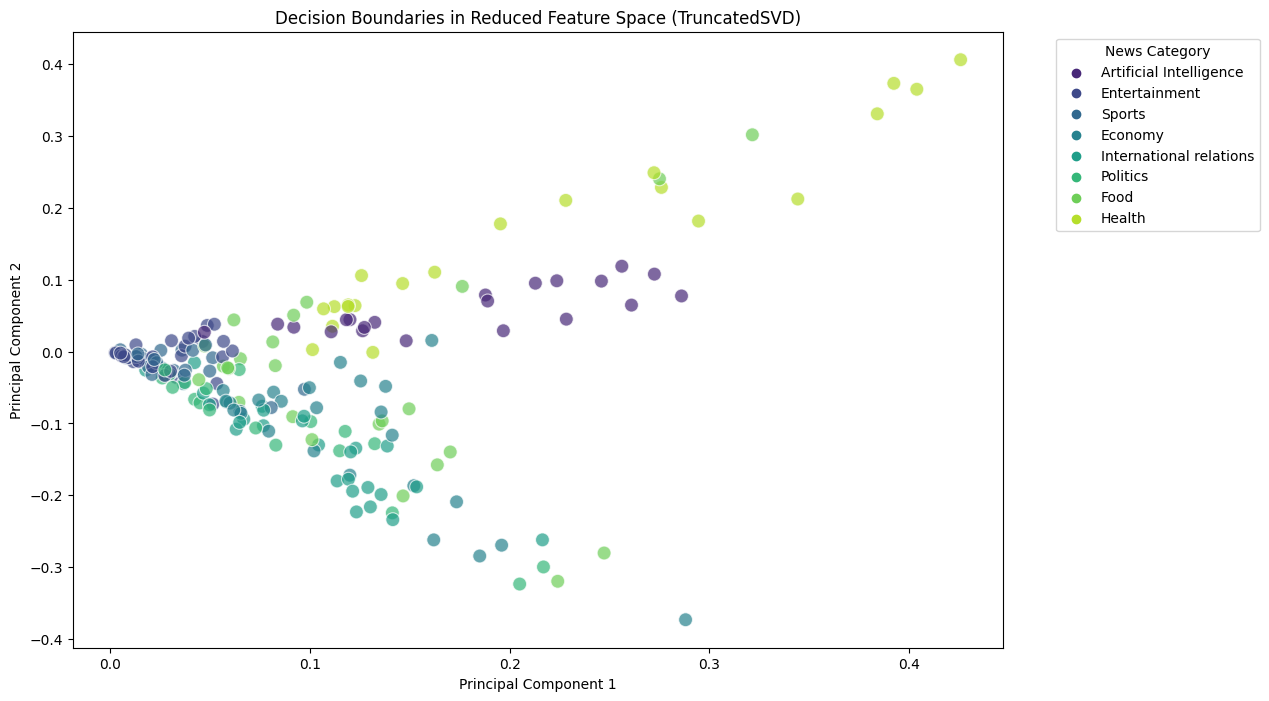

In [14]:
# Import necessary libraries for visualization and dimensionality reduction
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Fit TruncatedSVD to the TF-IDF matrix for dimensionality reduction
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_train_tfidf)

# Create a scatter plot to visualize decision boundaries
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=y_train, palette='viridis', marker='o', s=100, alpha=0.7)
plt.title('Decision Boundaries in Reduced Feature Space (TruncatedSVD)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='News Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**How can we explore the distribution of the number of words in the cleaned news articles after additional data inclusion?**

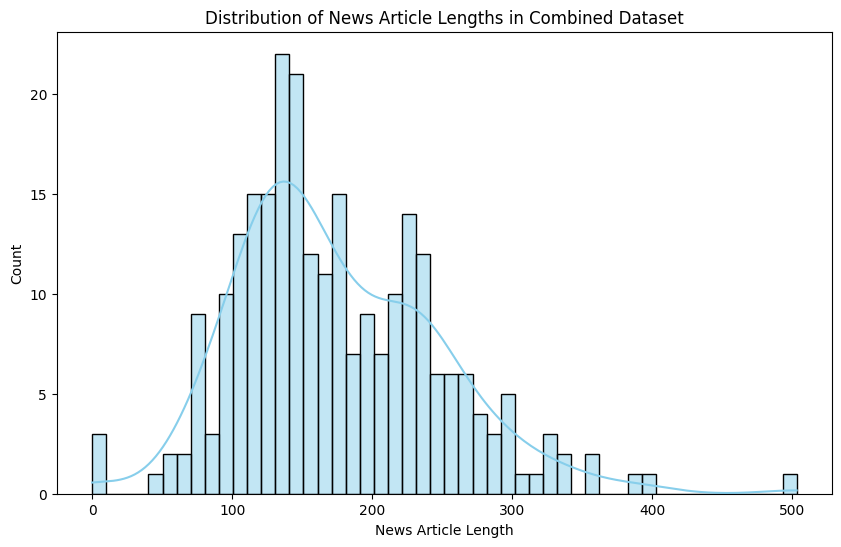

In [15]:
# Create synthetic additional data for demonstration purposes
additional_data = pd.DataFrame({
    'News': ['Synthetic news article 1', 'Synthetic news article 2', 'Synthetic news article 3'],
    'Category': ['Category_A', 'Category_B', 'Category_A']
})

# Concatenate the original and additional datasets
combined_data = pd.concat([df, additional_data], ignore_index=True)

# Fill NaN values in 'Cleaned_News' column with empty strings
combined_data['Cleaned_News'].fillna('', inplace=True)

# Calculate the length of each cleaned news article in the combined dataset
combined_data['News_Length'] = combined_data['Cleaned_News'].apply(len)

# Plot the distribution of news article lengths in the combined dataset
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['News_Length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of News Article Lengths in Combined Dataset')
plt.xlabel('News Article Length')
plt.ylabel('Count')
plt.show()


**How can we analyze and visualize the distribution of news categories in the combined dataset, including both original and additional labeled data?**

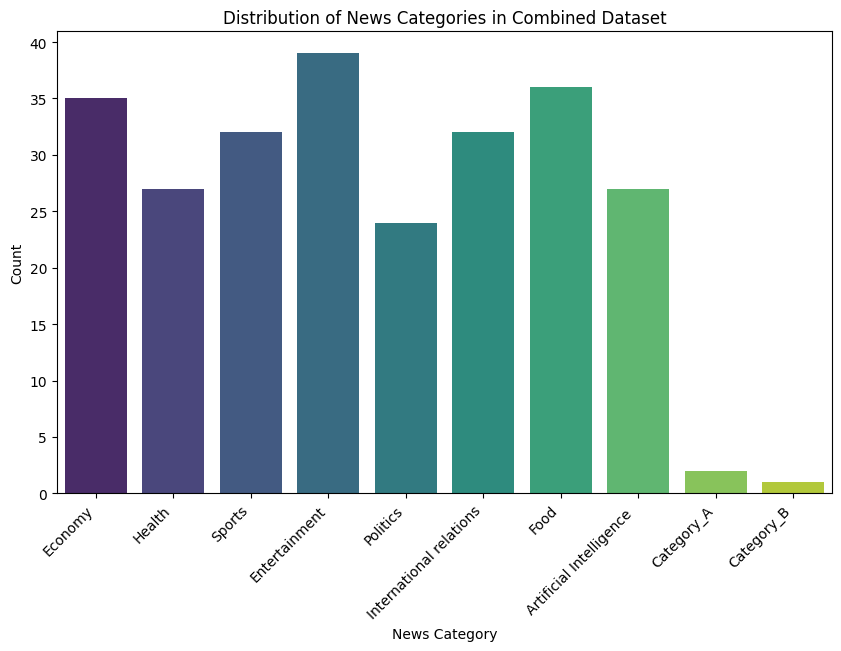

In [16]:
# Plot the distribution of news categories in the combined dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=combined_data, palette='viridis')
plt.title('Distribution of News Categories in Combined Dataset')
plt.xlabel('News Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


**How can we explore the relationships between different news categories in the combined dataset using a heatmap?**

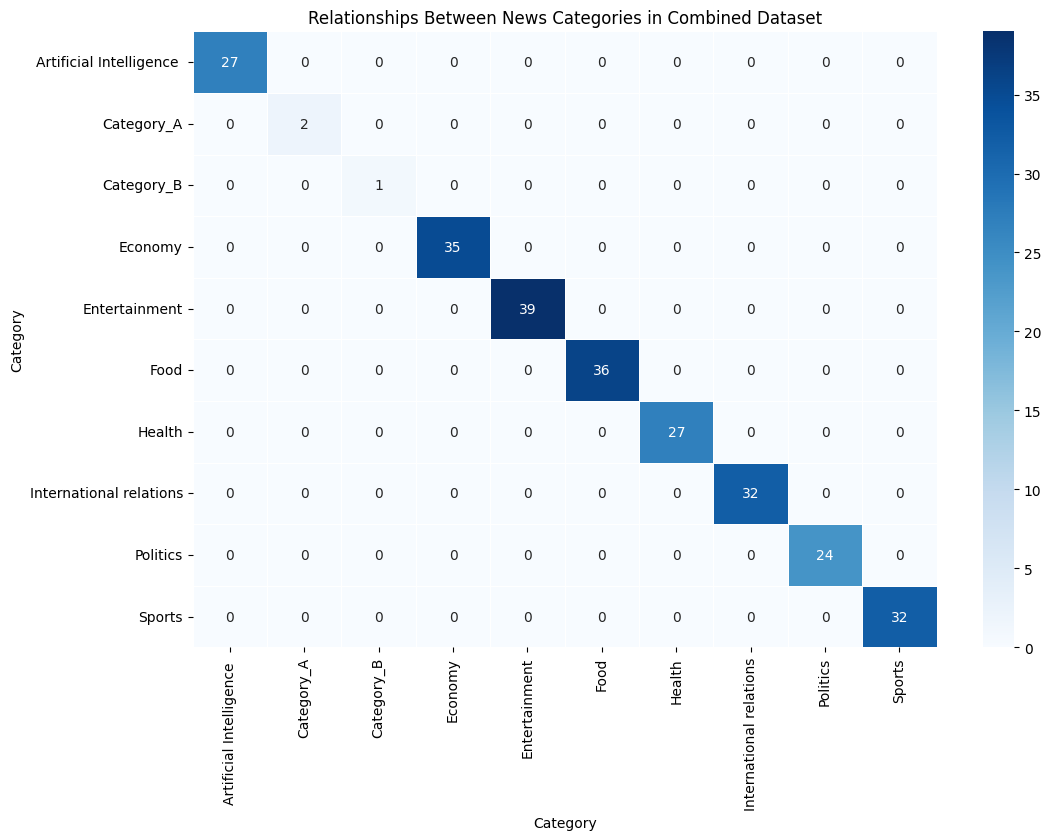

In [17]:
# Create a pivot table to represent relationships between news categories
category_relationships = combined_data.groupby(['Category', 'Category']).size().unstack(fill_value=0)

# Plot a heatmap to visualize the relationships
plt.figure(figsize=(12, 8))
sns.heatmap(category_relationships, cmap='Blues', annot=True, fmt='d', linewidths=.5)
plt.title('Relationships Between News Categories in Combined Dataset')
plt.xlabel('Category')
plt.ylabel('Category')
plt.show()


**How can we analyze and visualize the distribution of news article lengths across different categories in the combined dataset?**

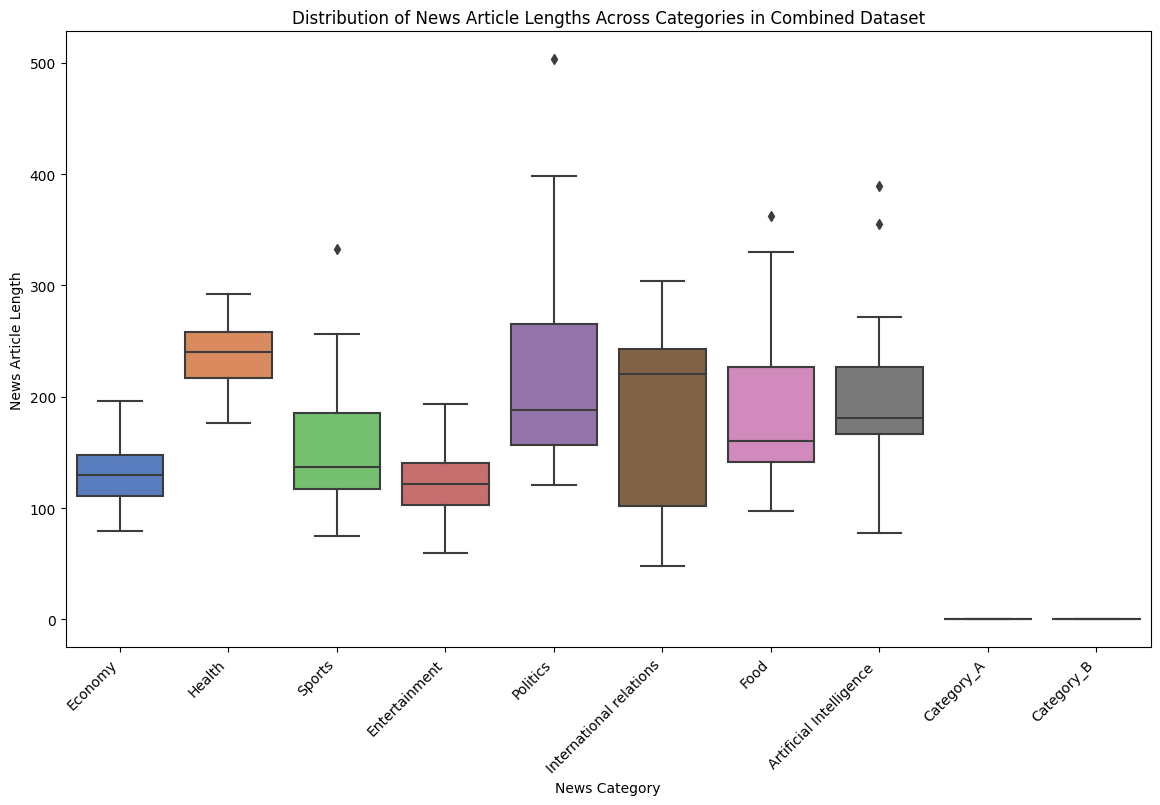

In [18]:
# Plot boxplots to visualize the distribution of news article lengths by category
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='News_Length', data=combined_data, palette='muted')
plt.title('Distribution of News Article Lengths Across Categories in Combined Dataset')
plt.xlabel('News Category')
plt.ylabel('News Article Length')
plt.xticks(rotation=45, ha='right')
plt.show()


**How can we compare the average length of news articles across different categories in the combined dataset**

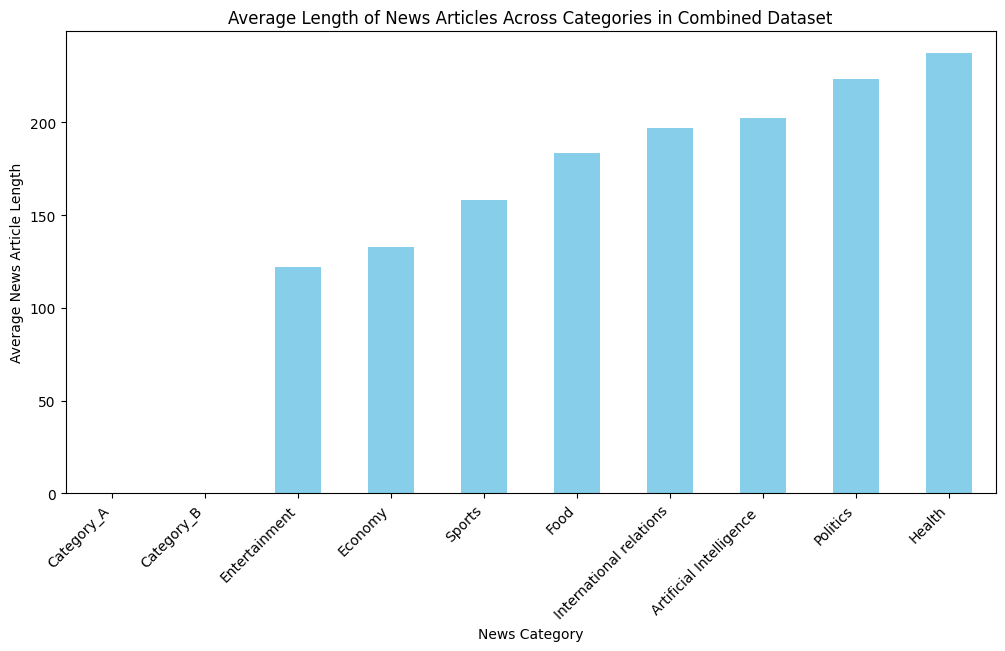

In [19]:
# Calculate the average length of news articles for each category
avg_length_by_category = combined_data.groupby('Category')['News_Length'].mean().sort_values()

# Plot a bar chart to compare average lengths across categories
plt.figure(figsize=(12, 6))
avg_length_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Length of News Articles Across Categories in Combined Dataset')
plt.xlabel('News Category')
plt.ylabel('Average News Article Length')
plt.xticks(rotation=45, ha='right')
plt.show()


**Calculate the average sentiment score for each news category**

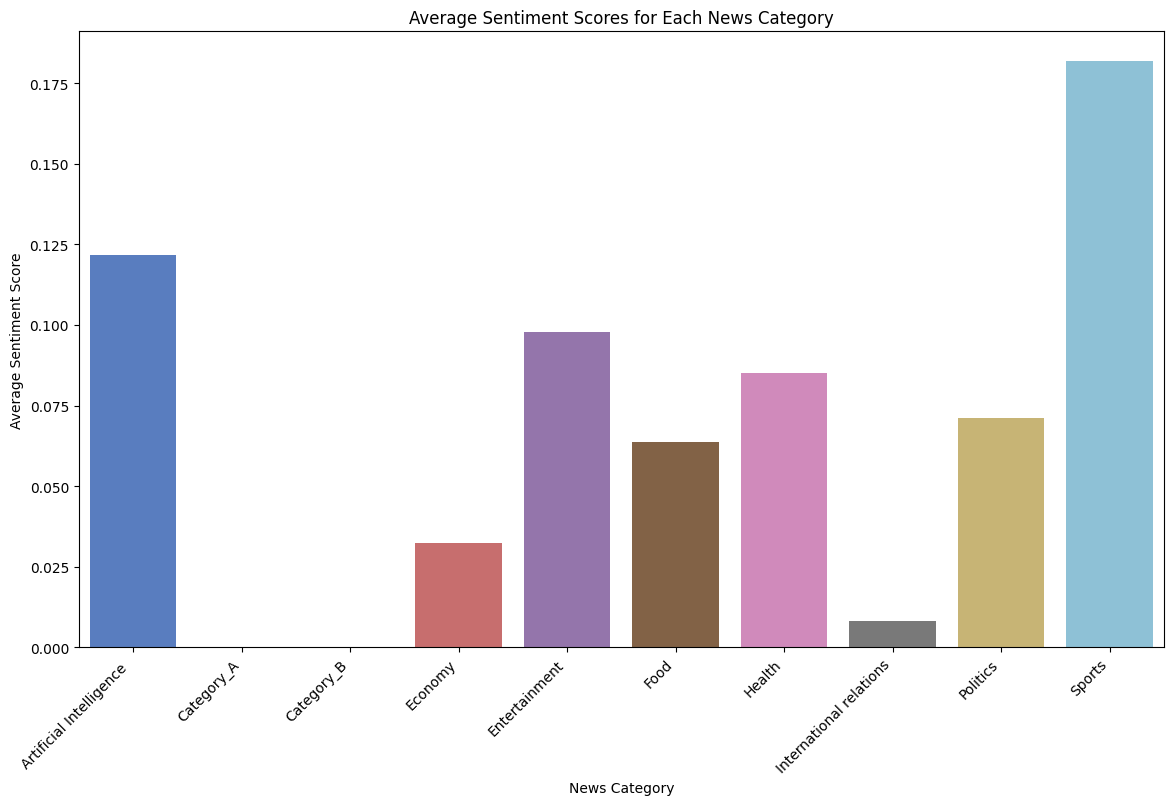

In [20]:
# Calculate the average sentiment score for each news category
average_sentiment_by_category = combined_data.groupby('Category')['Sentiment'].mean().reset_index()

# Create a bar plot to visualize average sentiment scores by category
plt.figure(figsize=(14, 8))
sns.barplot(x='Category', y='Sentiment', data=average_sentiment_by_category, palette='muted')
plt.title('Average Sentiment Scores for Each News Category')
plt.xlabel('News Category')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.show()
